<a href="https://colab.research.google.com/github/lenkalapellypraveen/Credit-Balance-Predictor-Elastic-Net-Modeling-for-Consumer-Credit-Risk-Assessment/blob/dev/Credit_Balance_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Balance Predictor: Elastic Net Modeling for Consumer Credit Risk Assessment**

**1. Data Acquisition:**

a) Load the dataset.

In [ ]:
# Importing the libraries
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading Credit card data
Customer_data = pd.read_csv('/content/drive/MyDrive/Source_data/Credit_N400_p9.csv')

**2. Data Exploration and Understanding:**

a) Examine basic dataset properties.\
b) Check data types, missing values.\
c) Explore data distribution and relationships.

In [ ]:
# Print Customer data
Customer_data

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,903
2,104.593,7075,514,4,71,11,Male,No,No,580
3,148.924,9504,681,3,36,11,Female,No,No,964
4,55.882,4897,357,2,68,16,Male,No,Yes,331
...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,560
396,13.364,3838,296,5,65,17,Male,No,No,480
397,57.872,4171,321,5,67,12,Female,No,Yes,138
398,37.728,2525,192,1,44,13,Male,No,Yes,0


In [ ]:
# Basic exploration
print(f'Customer_data_shape: \n{Customer_data.shape}\n')
print(f'Customer_data_info:')
print(f'{Customer_data.info()}\n')
print(f'Customer_data_describe: \n{Customer_data.describe()}\n')

Customer_data_shape: 
(400, 10)

Customer_data_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 31.4+ KB
None

Customer_data_describe: 
           Income         Limit      Rating       Cards         Age  \
count  400.000000    400.000000  400.000000  400.000000  400.000000   
mean    45.218885   4735.600000  354.940000    2.957500   55.667500   
std     35.244273   2308.198848  154.724143    1.371275

In [ ]:
# Check for missing values
print(Customer_data.isnull().sum())

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Balance      0
dtype: int64


**3. Data Preprocessing:**

a) Handle categorical variables.\
b) Deal with any outliers or missing values.\
c) Feature scaling/normalization.\
d) Feature engineering.

In [ ]:
# Define binary mappings for categorical variables
binary_mappings = {
    'Gender' : {'Male': 1, 'Female': 0},
    'Student' : {'Yes': 1, 'No': 0},
    'Married' : {'Yes': 1, 'No': 0}
}

for col, mapping in binary_mappings.items():
    Customer_data[col] = Customer_data[col].map(mapping)


In [ ]:
Customer_data

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,1,0,1,333
1,106.025,6645,483,3,82,15,0,1,1,903
2,104.593,7075,514,4,71,11,1,0,0,580
3,148.924,9504,681,3,36,11,0,0,0,964
4,55.882,4897,357,2,68,16,1,0,1,331
...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,1,0,1,560
396,13.364,3838,296,5,65,17,1,0,0,480
397,57.872,4171,321,5,67,12,0,0,1,138
398,37.728,2525,192,1,44,13,1,0,1,0


In [ ]:
Customer_data.describe()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,0.482500,0.100000,0.61250,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,0.500319,0.300376,0.48779,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000,0.00000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,0.000000,0.000000,0.00000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,0.000000,0.000000,1.00000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,1.000000,0.000000,1.00000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1.000000,1.000000,1.00000,1999.000000


In [ ]:
# Split features and target
X = Customer_data.drop('Balance', axis=1)
y = Customer_data['Balance']

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize features
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
# (subtracts mean and divides by standard deviation)
# (subtracts mean) -- > Centering
# (Centering divides by standard deviation) -- > Standardization
X_scaled = scaler.fit_transform(X)

# Convert the numpy array back to a pandas DataFrame with column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# Center the target variable (subtracts mean)
y_centered = y - y.mean()

**4. Feature Selection**

a) Analyze feature importance.\
b) Consider dimensionality reduction if needed

In [ ]:
# Basic feature importance using correlation
correlations = X.corrwith(y).abs().sort_values(ascending=False)
print(f'Feature correlations with Balance: \n{correlations}')

Feature correlations with Balance:
Rating       0.863625
Limit        0.861697
Income       0.463656
Student      0.259018
Cards        0.086456
Gender       0.021474
Education    0.008062
Married      0.005673
Age          0.001835
dtype: float64


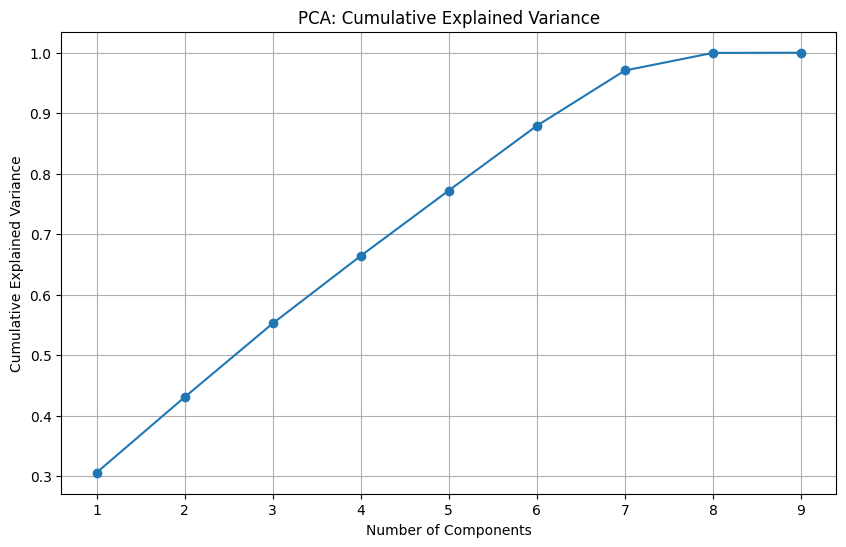

In [ ]:
# Principal Component Analysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.grid(True)
plt.show()

**5. Train-Test Split:**

a) Create training and testing datasets.

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_centered, test_size=0.2, random_state=42
)

**6. Model Selection and Implementation:**

a) Implement Elastic Net model.\
b) Set up Ridge and Lasso for comparison.

In [ ]:
# Define parameter grids
alpha_values = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
lambda_values = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
# Define models
elastic_net = ElasticNet(max_iter=10000, tol=1e-4, random_state=42)
ridge = Ridge(random_state=42)
lasso = Lasso(max_iter=10000, tol=1e-4, random_state=42)

# Parameter grids
elastic_params = {
    'alpha': lambda_values,
    'l1_ratio': alpha_values
}

ridge_params = {'alpha': lambda_values}
lasso_params = {'alpha': lambda_values}

**7. Hyperparameter Tuning:**

a) Use cross-validation to find optimal parameters.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
# Perform grid search with cross-validation
elastic_search = GridSearchCV(
    elastic_net, elastic_params, cv=5, scoring='neg_mean_squared_error'
)
elastic_search.fit(X_train, y_train)

ridge_search = GridSearchCV(
    ridge, ridge_params, cv=5, scoring='neg_mean_squared_error'
)
ridge_search.fit(X_train, y_train)

lasso_search = GridSearchCV(
    lasso, lasso_params, cv=5, scoring='neg_mean_squared_error'
)
lasso_search.fit(X_train, y_train)

# Get best parameters
print(f'Best Elastic Net parameters: {elastic_search.best_params_}')
print(f'Best Ridge parameters: {ridge_search.best_params_}')
print(f'Best Lasso parameters: {lasso_search.best_params_}')

Best Elastic Net parameters: {'alpha': 1, 'l1_ratio': 1.0}
Best Ridge parameters: {'alpha': 0.1}
Best Lasso parameters: {'alpha': 1}


**8. Model Training and Evaluation:**

a) Train models with optimal parameters.\
b) Evaluate performance

In [ ]:
# Train final models with best parameters
best_elastic = ElasticNet(**elastic_search.best_params_, random_state=42)
best_ridge = Ridge(alpha=ridge_search.best_params_['alpha'], random_state=42)
best_lasso = Lasso(alpha=lasso_search.best_params_['alpha'], random_state=42)

In [ ]:
# Train on training data
best_elastic.fit(X_train, y_train)
best_ridge.fit(X_train, y_train)
best_lasso.fit(X_train, y_train)

Lasso(alpha=1, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
elastic_preds = best_elastic.predict(X_test)
ridge_preds = best_ridge.predict(X_test)
lasso_preds = best_lasso.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - MSE: {mse:.2f}, R²: {r2:.4f}')
    return mse, r2

elastic_metrics = evaluate_model(y_test, elastic_preds, 'Elastic Net')
ridge_metrics = evaluate_model(y_test, ridge_preds, 'Ridge')
lasso_metrics = evaluate_model(y_test, lasso_preds, 'Lasso')

Elastic Net - MSE: 8233.95, R²: 0.9507
Ridge - MSE: 8016.14, R²: 0.9520
Lasso - MSE: 8233.95, R²: 0.9507


**9. Coefficient Analysis and Feature Importance:**

a) Analyze how regularization affects coefficients.\
b) Identify key predictors.

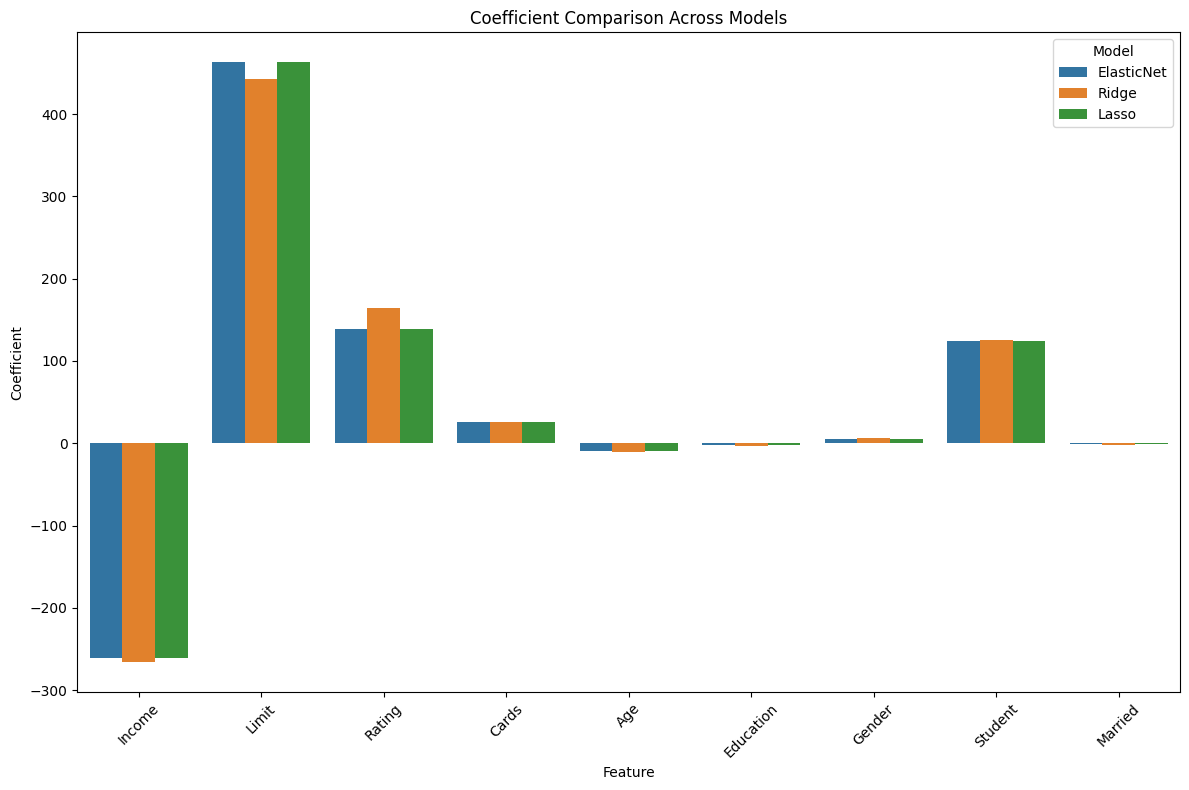

In [ ]:
import seaborn as sns
# Create dataframe of coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'ElasticNet': best_elastic.coef_,
    'Ridge': best_ridge.coef_,
    'Lasso': best_lasso.coef_
})

# Plot coefficient comparison
plt.figure(figsize=(12, 8))
coef_melted = pd.melt(coef_df, id_vars='Feature', var_name='Model', value_name='Coefficient')
sns.barplot(x='Feature', y='Coefficient', hue='Model', data=coef_melted)
plt.title('Coefficient Comparison Across Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**10. Visualization of Results:**

a) Plot regularization paths.\
b) Visualize model predictions.

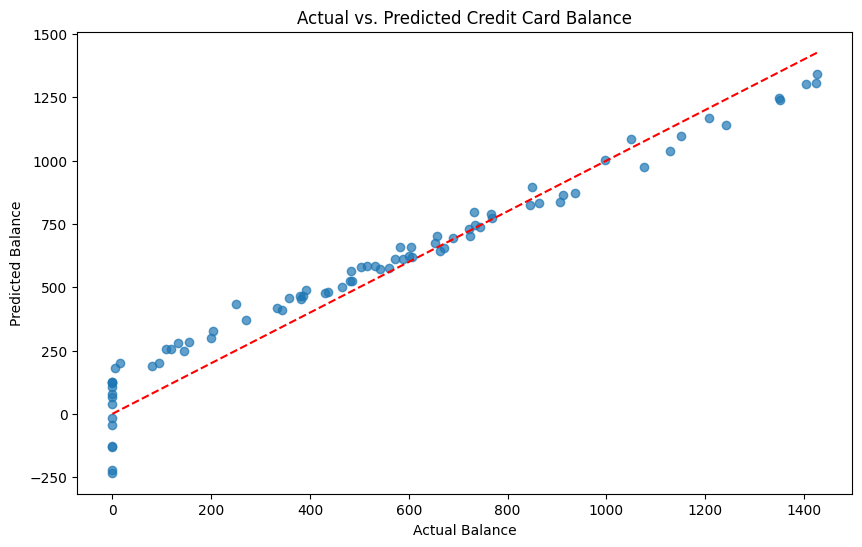

In [ ]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test + y.mean(), elastic_preds + y.mean(), alpha=0.7)
plt.plot([y_test.min() + y.mean(), y_test.max() + y.mean()],
         [y_test.min() + y.mean(), y_test.max() + y.mean()], 'r--')
plt.xlabel('Actual Balance')
plt.ylabel('Predicted Balance')
plt.title('Actual vs. Predicted Credit Card Balance')
plt.show()

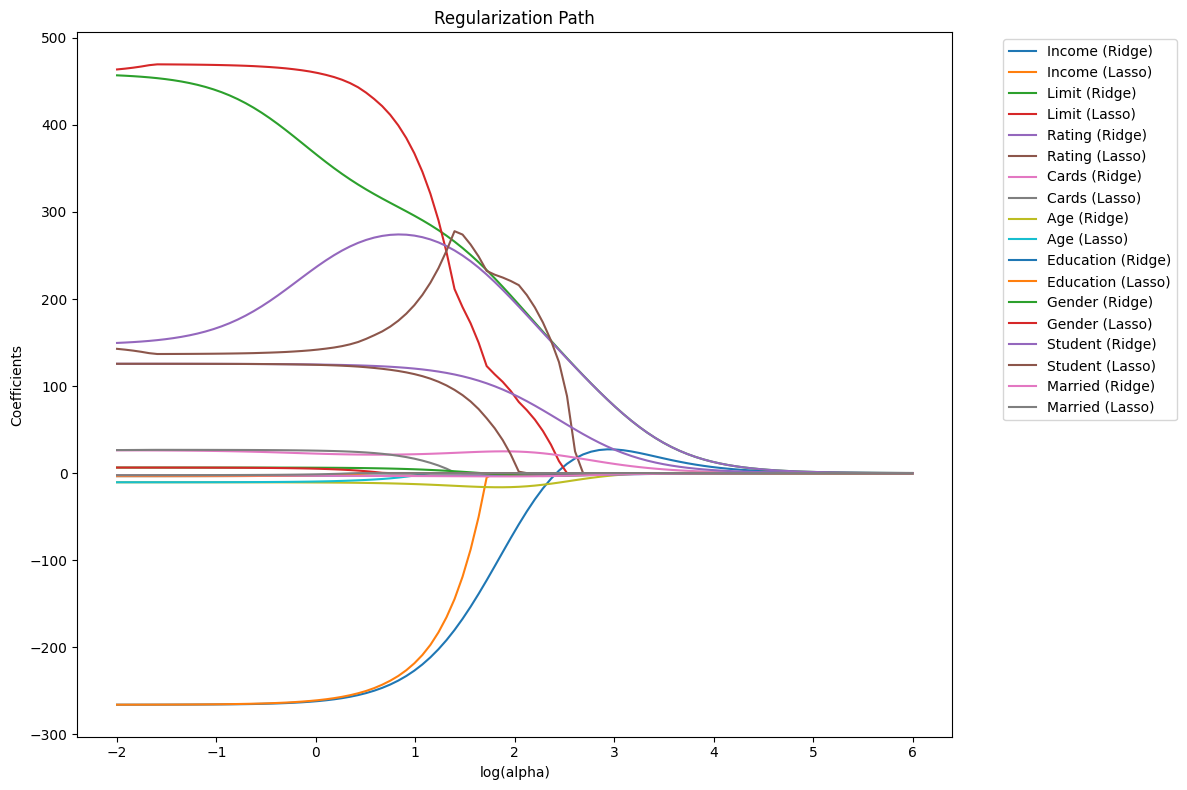

In [ ]:
# Create regularization path visualization
alphas = np.logspace(-2, 6, 100)
coefs = []
models = []

for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    models.append('Ridge')

    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    models.append('Lasso')

coef_df_reg_path = pd.DataFrame(coefs)
coef_df_reg_path.columns = X.columns
coef_df_reg_path['alpha'] = np.repeat(alphas, 2)
coef_df_reg_path['model'] = models

plt.figure(figsize=(12, 8))
for column in X.columns:
    for model in ['Ridge', 'Lasso']:
        subset = coef_df_reg_path[coef_df_reg_path['model'] == model]
        plt.plot(np.log10(subset['alpha']), subset[column],
                 label=f"{column} ({model})")

plt.xlabel('log(alpha)')
plt.ylabel('Coefficients')
plt.title('Regularization Path')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**11. Model Deployment Preparation:**

a) Prepare the model for deployment.\
b) Create prediction function.

In [ ]:
# Function to preprocess new data and make predictions
def predict_balance(new_data, model, scaler, y_mean):
    # Convert categorical variables
    for col, mapping in binary_mappings.items():
        if col in new_data:
            new_data[col] = new_data[col].map(mapping)

    # Scale features
    new_data_scaled = scaler.transform(new_data)

    # Make prediction
    prediction = model.predict(new_data_scaled)

    # Uncenter prediction
    final_prediction = prediction + y_mean

    return final_prediction

# testing on unseen data
sample_customer = {
    'Income': 14.891,
    'Limit': 3606,
    'Rating': 283,
    'Cards': 2,
    'Age': 34,
    'Education': 11,
    'Gender': 'Male',
    'Student': 'No',
    'Married': 'Yes'
}

sample_df = pd.DataFrame([sample_customer])
predicted_balance = predict_balance(sample_df, best_elastic, scaler, y.mean())
print(f'Predicted balance for sample customer: ${predicted_balance[0]:.0f}')

Predicted balance for sample customer: $418


**12. Documentation and Reporting:**

a) Document findings and model performance.\
b) Create visualizations for key insights.\
c) Prepare summary for stakeholders.

In [ ]:
# Model comparison summary
models_summary = pd.DataFrame({
    'Model': ['Elastic Net', 'Ridge', 'Lasso'],
    'MSE': [elastic_metrics[0], ridge_metrics[0], lasso_metrics[0]],
    'R-squared': [elastic_metrics[1], ridge_metrics[1], lasso_metrics[1]],
    'Alpha': [elastic_search.best_params_['alpha'],
              ridge_search.best_params_['alpha'],
              lasso_search.best_params_['alpha']]
})

if 'l1_ratio' in elastic_search.best_params_:
    models_summary.loc[0, 'l1_ratio'] = elastic_search.best_params_['l1_ratio']

print('Model Performance Summary:')
print(models_summary)

# Feature importance summary
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(best_lasso.coef_)
}).sort_values('Importance', ascending=False)

print('\nFeature Importance (based on Lasso coefficients):')
print(importance_df)

Model Performance Summary:
         Model          MSE  R-squared  Alpha  l1_ratio
0  Elastic Net  8233.949674   0.950717    1.0       1.0
1        Ridge  8016.140086   0.952020    0.1       NaN
2        Lasso  8233.949674   0.950717    1.0       NaN

Feature Importance (based on Lasso coefficients):
     Feature  Importance
1      Limit  462.838496
0     Income  261.042184
2     Rating  138.905662
7    Student  124.547794
3      Cards   26.054282
4        Age    9.919219
6     Gender    5.005176
5  Education    2.673081
8    Married    1.285489
